<a href="https://colab.research.google.com/github/denpetrov/convolutional_neural_networks_tensorflow/blob/master/w04_Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  with open(filename) as training_file:
    # Your code starts here
    images = []
    labels = []

    csv_reader = csv.reader(training_file, delimiter=',')
    for row in csv_reader:
      if csv_reader.line_num > 1:
        labels.append(row[0])
        arr_float = np.array(row[1:]).astype(float)
        images.append(np.array_split(arr_float, 28))
  images = np.asarray(images)
  labels = np.asarray(labels)
    # Your code ends here
  return images, labels

print('Reading sign_mnist_train.csv')
training_images, training_labels = get_data('sign_mnist_train.csv')
print(training_images.shape)
print(training_labels.shape)

print('Reading sign_mnist_test.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Reading sign_mnist_train.csv
(27455, 28, 28)
(27455,)
Reading sign_mnist_test.csv
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

if len(training_images.shape) < 4:
  training_images = np.expand_dims(training_images, axis=3)   # Your Code Here

if len(testing_images.shape) < 4:
  testing_images = np.expand_dims(testing_images, axis=3)  # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
	  rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # I set it here. It is better.
    fill_mode='nearest'
    )

train_datagen.fit(training_images)

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255
    )

validation_datagen.fit(testing_images)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
train_generator = train_datagen.flow(training_images, training_labels, batch_size=32)

validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

In [30]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')]
    )

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])  # Your Code Here

# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(training_images) / 32,
                              epochs=25,
                              validation_data=validation_generator,
                              verbose=1,
                              validation_steps=len(testing_images) / 32)  # Your Code Here

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/25
858/857 [==============================] - 17s 19ms/step - loss: 2.5040 - acc: 0.2423 - val_loss: 1.2645 - val_acc: 0.6074
Epoch 2/25
858/857 [==============================] - 16s 19ms/step - loss: 1.6561 - acc: 0.4707 - val_loss: 0.9377 - val_acc: 0.6576
Epoch 3/25
858/857 [==============================] - 16s 19ms/step - loss: 1.2700 - acc: 0.5875 - val_loss: 0.5124 - val_acc: 0.8261
Epoch 4/25
858/857 [==============================] - 16s 19ms/step - loss: 1.0328 - acc: 0.6547 - val_loss: 0.3481 - val_acc: 0.8878
Epoch 5/25
858/857 [==============================] - 16s 19ms/step - loss: 0.8879 - acc: 0.7049 - val_loss: 0.2790 - val_acc: 0.9230
Epoch 6/25
858/857 [==============================] - 16s 19ms/step - loss: 0.8041 - acc: 0.7348 - val_loss: 0.2003 - val_acc: 0.9445
Epoch 7/25
858/857 [==============================] - 16s 18ms/step - loss: 0.7280 - acc: 0.7593 - val_loss: 0.2403 - val_acc: 0.9069
Epoch 8/25
858/857 [==============================] - 16s 18ms

[6.92426086682151, 0.56609035]

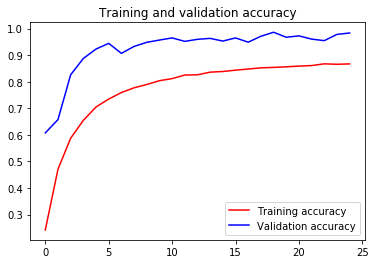

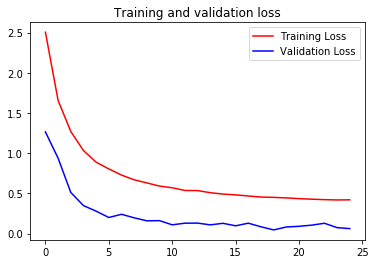

In [31]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']  # Your Code Here
val_acc = history.history['val_acc']  # Your Code Here
loss = history.history['loss']  # Your Code Here
val_loss = history.history['val_loss']  # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()